In [6]:
using Random, Plots
using DifferentialEquations
# using Optimization, Lux, DiffEqFlux,  OptimizationOptimJL
rng = Random.default_rng()

mumax(T) = -0.00266071 .* T .^ 2 .+ 0.18037857 .* T .- 2.86700000
xmax(T) = 0.76071429 .* T .^ 2 .- 55.69857143 .* T .+ 1058.18000000
pmax(T) = 0.57678571 .* T .^ 2 .- 42.06642857 .* T .+ 838.23200000
ypx(T) = -0.02071429 .* T .^ 2 .+ 1.90357143 .* T .- 26.44400000
yx(T) = -0.00016071 .* T .^ 2 .+ 0.00917857 .* T .- 0.09160000

function ethanol(du, u, p, t)
    h, cp, d, frec, v, ks, ki, m, n, mx, mp, Tsp = p
    #################################
    X = u[1]
    S = u[2]
    P = u[3]
    T = u[4]
    ################################
    du[1] = mumax(T) * (S / (S + ks)) * real((1 - (X / xmax(T)) + 0im)^m) 
    du[2] = -((du[1] / yx(T)) + (mx * X))
    du[3] = (ypx(T) * du[1]) + (mp * X)

    # for the version with a controller, uncomment this
    if T ≤ Tsp
        du[4] = (h / (d * cp)) * du[2]
    else
        du[4] = (h / (d * cp)) * du[2] - (frec / v) * (T - Tsp)
    end
end

function ethanol_2(du, u, p, t)
    h, cp, d, frec, v, ks, ki, m, n, mx, mp, Tsp = p
    ########################
    X, P, S, T = u
    ########################
    du[1] = mumax(T) * (S / (S + ks)) * real((1 - (X / xmax(T)) + 0im)^m)
    du[2] = -((du[1] / yx(T)) + (mx * X))
    du[3] = (ypx(T) * du[1]) + (mp * X)

    # for the version with a controller, uncomment this
    if T ≤ Tsp
        du[4] = (h / (d * cp)) * du[2]
    else
        du[4] = (h / (d * cp)) * du[2] - (frec / v) * (T - Tsp)
    end
end

ethanol_2 (generic function with 1 method)

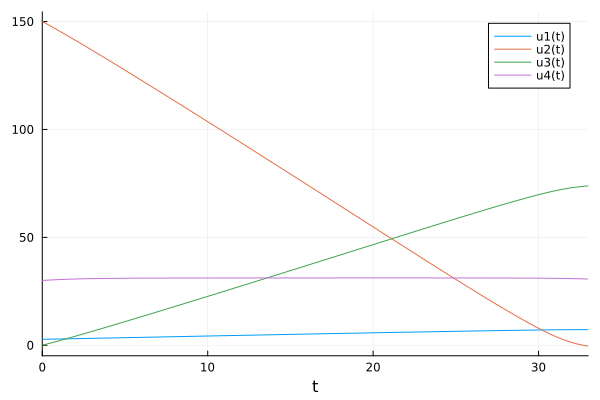

In [5]:
tspan = (0.0, 33.0)
ts = collect(0.0:0.1:tspan[2])
u0 = [2.75; 150; 0; 30]
p = [-511 3.82 1060 31 59.66 4.1 4e-3 1.0 1.5 0.2 0.1 30.0]
prob = DifferentialEquations.ODEProblem(ethanol, u0, tspan, p)
# https://docs.sciml.ai/DiffEqDocs/stable/basics/common_solver_opts/
sol = DifferentialEquations.solve(prob, Tsit5(), saveat=ts)  # saveat=ts to save more points
plot(sol)

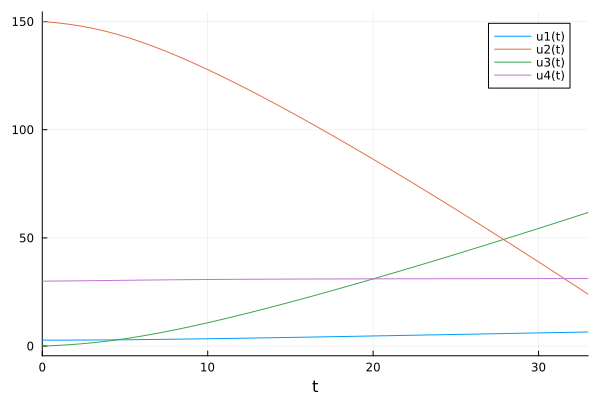

In [7]:
prob_2 = DifferentialEquations.ODEProblem(ethanol_2, u0, tspan, p)
# https://docs.sciml.ai/DiffEqDocs/stable/basics/common_solver_opts/
sol_2 = DifferentialEquations.solve(prob_2, Tsit5(), saveat=ts)  # saveat=ts to save more points
plot(sol_2)